<a href="https://colab.research.google.com/github/praveen-221/Age-Gender-Emotion-prediction-using-Audio/blob/main/ML_project_Gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Gender Classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
#data = pd.read_csv("/content/drive/MyDrive/cleaned-dataset/cleaned_gender.csv")
data = pd.read_csv("/content/drive/MyDrive/cleaned_gender.csv")
#data = pd.read_csv("/content/cleaned_gender.csv")
# data = pd.read_csv("cleaned_gender.csv")
data

,Unnamed: 0,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,66,0.133338,0.069304,0.107668,0.089192,0.195267,0.106075,3.043456,13.694173,0.929512,...,0.133338,0.121968,0.047337,0.277457,0.822656,0.0000,4.687500,4.687500,0.076296,male
1,84,0.137433,0.058518,0.112037,0.092841,0.200079,0.107238,2.807995,12.776650,0.911080,...,0.137433,0.111204,0.047151,0.277457,1.313384,0.0000,6.046875,6.046875,0.135811,male
2,85,0.142227,0.065447,0.112242,0.093455,0.202909,0.109455,2.380899,9.942833,0.936040,...,0.142227,0.118711,0.047013,0.275862,0.593750,0.0000,6.539062,6.539062,0.096102,male
3,87,0.133325,0.072849,0.113360,0.082861,0.203753,0.120892,1.904123,7.799218,0.958362,...,0.133325,0.116200,0.047105,0.279070,0.424922,0.0000,5.812500,5.812500,0.081880,male
4,88,0.130487,0.070407,0.113418,0.076098,0.196188,0.120089,1.820873,8.561101,0.969568,...,0.130487,0.114802,0.047151,0.279070,0.198070,0.0000,1.078125,1.078125,0.131579,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,6220,0.241377,0.039956,0.252299,0.225070,0.269297,0.044227,2.730197,11.467950,0.847220,...,0.241377,0.176361,0.047666,0.279070,1.224946,0.0000,6.140625,6.140625,0.093181,female
4357,6222,0.235059,0.053056,0.252532,0.231392,0.264468,0.033077,2.869390,12.009156,0.859784,...,0.235059,0.120552,0.047572,0.274286,1.103427,0.0000,10.382812,10.382812,0.056716,male
4358,6224,0.230992,0.053711,0.252760,0.223666,0.265731,0.042065,3.277391,15.202833,0.861995,...,0.230992,0.162745,0.047059,0.277457,1.297944,0.1875,11.812500,11.625000,0.081470,female
4359,6230,0.240334,0.044747,0.253897,0.233837,0.265619,0.031782,2.826720,11.350446,0.850527,...,0.240334,0.134127,0.046967,0.271186,0.528390,0.0000,3.187500,3.187500,0.065266,male


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
data.label = le.fit_transform(data.label)
data

,Unnamed: 0,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,66,0.133338,0.069304,0.107668,0.089192,0.195267,0.106075,3.043456,13.694173,0.929512,...,0.133338,0.121968,0.047337,0.277457,0.822656,0.0000,4.687500,4.687500,0.076296,1
1,84,0.137433,0.058518,0.112037,0.092841,0.200079,0.107238,2.807995,12.776650,0.911080,...,0.137433,0.111204,0.047151,0.277457,1.313384,0.0000,6.046875,6.046875,0.135811,1
2,85,0.142227,0.065447,0.112242,0.093455,0.202909,0.109455,2.380899,9.942833,0.936040,...,0.142227,0.118711,0.047013,0.275862,0.593750,0.0000,6.539062,6.539062,0.096102,1
3,87,0.133325,0.072849,0.113360,0.082861,0.203753,0.120892,1.904123,7.799218,0.958362,...,0.133325,0.116200,0.047105,0.279070,0.424922,0.0000,5.812500,5.812500,0.081880,1
4,88,0.130487,0.070407,0.113418,0.076098,0.196188,0.120089,1.820873,8.561101,0.969568,...,0.130487,0.114802,0.047151,0.279070,0.198070,0.0000,1.078125,1.078125,0.131579,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,6220,0.241377,0.039956,0.252299,0.225070,0.269297,0.044227,2.730197,11.467950,0.847220,...,0.241377,0.176361,0.047666,0.279070,1.224946,0.0000,6.140625,6.140625,0.093181,0
4357,6222,0.235059,0.053056,0.252532,0.231392,0.264468,0.033077,2.869390,12.009156,0.859784,...,0.235059,0.120552,0.047572,0.274286,1.103427,0.0000,10.382812,10.382812,0.056716,1
4358,6224,0.230992,0.053711,0.252760,0.223666,0.265731,0.042065,3.277391,15.202833,0.861995,...,0.230992,0.162745,0.047059,0.277457,1.297944,0.1875,11.812500,11.625000,0.081470,0
4359,6230,0.240334,0.044747,0.253897,0.233837,0.265619,0.031782,2.826720,11.350446,0.850527,...,0.240334,0.134127,0.046967,0.271186,0.528390,0.0000,3.187500,3.187500,0.065266,1


In [ ]:
X = data.drop("label", axis="columns")
X

,Unnamed: 0,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,66,0.133338,0.069304,0.107668,0.089192,0.195267,0.106075,3.043456,13.694173,0.929512,...,0.086962,0.133338,0.121968,0.047337,0.277457,0.822656,0.0000,4.687500,4.687500,0.076296
1,84,0.137433,0.058518,0.112037,0.092841,0.200079,0.107238,2.807995,12.776650,0.911080,...,0.101332,0.137433,0.111204,0.047151,0.277457,1.313384,0.0000,6.046875,6.046875,0.135811
2,85,0.142227,0.065447,0.112242,0.093455,0.202909,0.109455,2.380899,9.942833,0.936040,...,0.106545,0.142227,0.118711,0.047013,0.275862,0.593750,0.0000,6.539062,6.539062,0.096102
3,87,0.133325,0.072849,0.113360,0.082861,0.203753,0.120892,1.904123,7.799218,0.958362,...,0.108583,0.133325,0.116200,0.047105,0.279070,0.424922,0.0000,5.812500,5.812500,0.081880
4,88,0.130487,0.070407,0.113418,0.076098,0.196188,0.120089,1.820873,8.561101,0.969568,...,0.101534,0.130487,0.114802,0.047151,0.279070,0.198070,0.0000,1.078125,1.078125,0.131579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,6220,0.241377,0.039956,0.252299,0.225070,0.269297,0.044227,2.730197,11.467950,0.847220,...,0.270242,0.241377,0.176361,0.047666,0.279070,1.224946,0.0000,6.140625,6.140625,0.093181
4357,6222,0.235059,0.053056,0.252532,0.231392,0.264468,0.033077,2.869390,12.009156,0.859784,...,0.254402,0.235059,0.120552,0.047572,0.274286,1.103427,0.0000,10.382812,10.382812,0.056716
4358,6224,0.230992,0.053711,0.252760,0.223666,0.265731,0.042065,3.277391,15.202833,0.861995,...,0.267214,0.230992,0.162745,0.047059,0.277457,1.297944,0.1875,11.812500,11.625000,0.081470
4359,6230,0.240334,0.044747,0.253897,0.233837,0.265619,0.031782,2.826720,11.350446,0.850527,...,0.264169,0.240334,0.134127,0.046967,0.271186,0.528390,0.0000,3.187500,3.187500,0.065266


In [ ]:
y = data.label
y

0       1
1       1
2       1
3       1
4       1
       ..
4356    0
4357    1
4358    0
4359    1
4360    1
Name: label, Length: 4361, dtype: int64

In [ ]:
#Feature Selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest


bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_) #ChiSquare value of each feature with respect to y
#Higher the chisquare value, more is its contribution/ more valuable is the feature for predicting y
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(16,'Score')) #Choosing the 16 most valuable features

         Specs          Score
0   Unnamed: 0  431599.880071
8         kurt      76.700562
18      maxdom      54.211319
19     dfrange      53.456084
7         skew      29.335474
10         sfm      27.687687
6          IQR      16.084452
16     meandom      11.978770
4          Q25      10.822255
13     meanfun       5.585488
11        mode       2.652701
2           sd       2.165869
3       median       1.771413
1     meanfreq       1.767607
12    centroid       1.767607
17      mindom       1.565235


In [ ]:
l = featureScores.nlargest(16,'Score')['Specs']
print(l)
x_new = X[l]

0     Unnamed: 0
8           kurt
18        maxdom
19       dfrange
7           skew
10           sfm
6            IQR
16       meandom
4            Q25
13       meanfun
11          mode
2             sd
3         median
1       meanfreq
12      centroid
17        mindom
Name: Specs, dtype: object


In [ ]:
x_new.columns

Index(['Unnamed: 0', 'kurt', 'maxdom', 'dfrange', 'skew', 'sfm', 'IQR',
       'meandom', 'Q25', 'meanfun', 'mode', 'sd', 'median', 'meanfreq',
       'centroid', 'mindom'],
      dtype='object')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

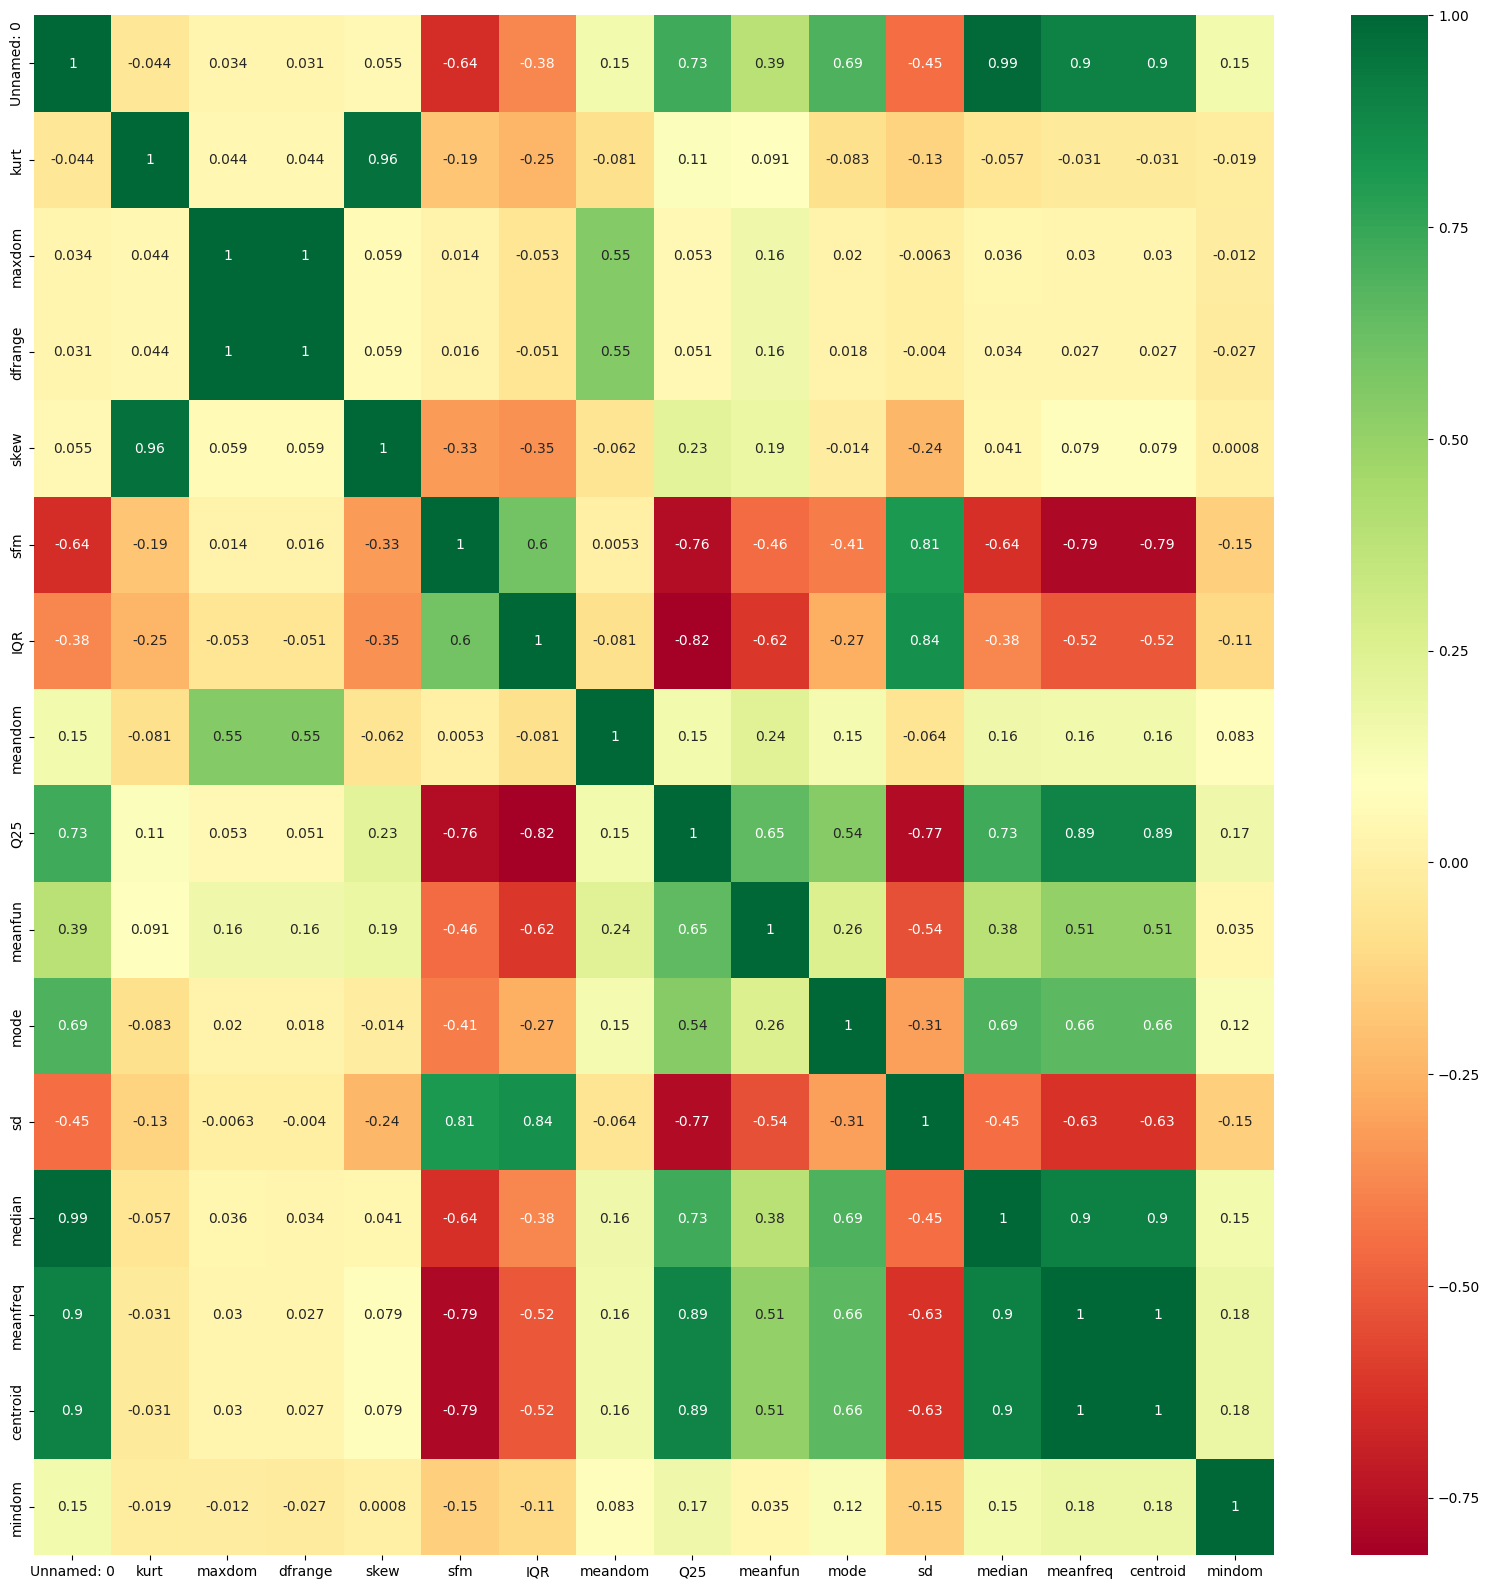

In [ ]:
corrmat = x_new.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(x_new[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In above heatmap we can see that 'Unnamed: 0' and  'median' has correlation value of nearly 1 and same for 'dfrange' and 'maxdom' and 'meanfreq' and 'centroid'. So we drop columns 'median' and 'dfrange' and 'meanfreq'

In [ ]:
x_new = x_new[['Unnamed: 0', 'kurt', 'maxdom', 'skew', 'sfm', 'IQR',
       'meandom', 'Q25', 'meanfun', 'mode', 'sd', 'meanfreq', 'mindom']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.3, random_state=1)
print(len(X_train), len(X_test))

3052 1309


**Decision Tree:**

In [ ]:
TreeModel = tree.DecisionTreeClassifier()
TreeModel.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
print(TreeModel.score(X_train, y_train))
print(TreeModel.score(X_test, y_test))

1.0
0.904507257448434


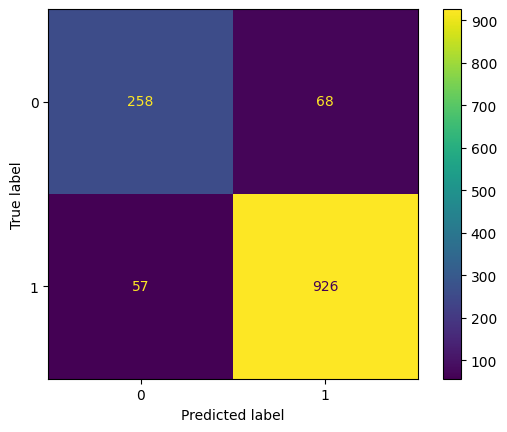

In [ ]:
y_pred = TreeModel.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred),3)}")
print(f"recall: {round(recall_score(y_test, y_pred),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.905
precision: 0.932
recall: 0.942
f1: 0.905


**Random Forest Classification:**

In [ ]:
RFModel = RandomForestClassifier()
RFModel.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = RFModel.predict(X_test)

In [ ]:
print(RFModel.score(X_train, y_train))
print(RFModel.score(X_test, y_test))

1.0
0.9419404125286478


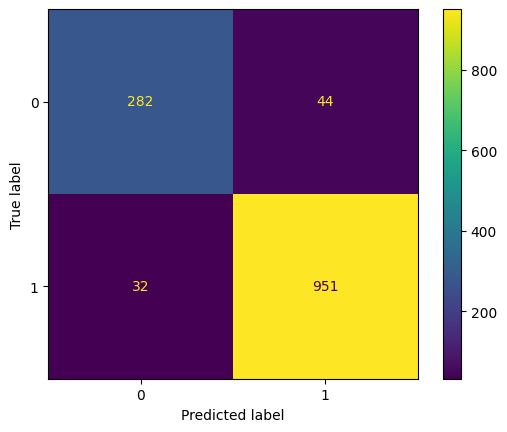

In [ ]:
y_pred = RFModel.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred),3)}")
print(f"recall: {round(recall_score(y_test, y_pred),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.942
precision: 0.956
recall: 0.967
f1: 0.942


**SVM:**

In [ ]:
SVMClassifier = SVC(gamma=0.001, C=0.5, kernel='linear')
SVMClassifier.fit(X_train, y_train)

SVC(C=0.5, gamma=0.001, kernel='linear')

In [ ]:
print(SVMClassifier.score(X_train, y_train))
print(SVMClassifier.score(X_test, y_test))

0.8070117955439057
0.7776928953399541


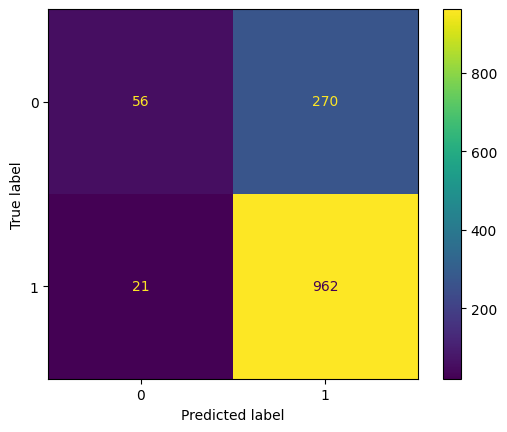

In [ ]:
y_pred = SVMClassifier.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred),3)}")
print(f"recall: {round(recall_score(y_test, y_pred),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.778
precision: 0.781
recall: 0.979
f1: 0.778


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.8119266055045872
0.7272727272727273


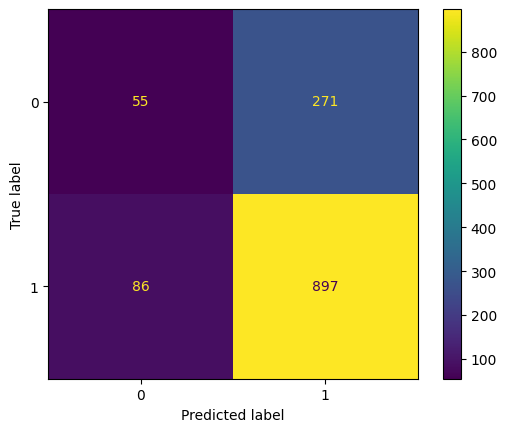

In [ ]:
y_pred = knn.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred),3)}")
print(f"recall: {round(recall_score(y_test, y_pred),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.727
precision: 0.768
recall: 0.913
f1: 0.727


XGB

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
print(xgb.score(X_train, y_train))
print(xgb.score(X_test, y_test))

1.0
0.9472880061115355


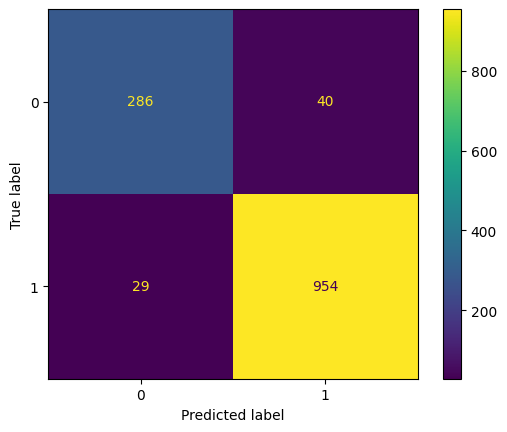

In [ ]:
y_pred = xgb.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred),3)}")
print(f"recall: {round(recall_score(y_test, y_pred),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.947
precision: 0.96
recall: 0.97
f1: 0.947


ANN


In [ ]:
#from xgboost import XGBClassifier
import tensorflow as tf
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
96/96 [==============================] - 6s 3ms/step - loss: 305.5488 - accuracy: 0.2667
Epoch 2/100
96/96 [==============================] - 0s 3ms/step - loss: 3.8564 - accuracy: 0.6835
Epoch 3/100
96/96 [==============================] - 0s 3ms/step - loss: 0.6608 - accuracy: 0.7179
Epoch 4/100
96/96 [==============================] - 0s 3ms/step - loss: 0.6432 - accuracy: 0.7146
Epoch 5/100
96/96 [==============================] - 0s 3ms/step - loss: 0.6195 - accuracy: 0.7294
Epoch 6/100
96/96 [==============================] - 0s 3ms/step - loss: 0.6520 - accuracy: 0.7123
Epoch 7/100
96/96 [==============================] - 0s 3ms/step - loss: 0.7535 - accuracy: 0.7077
Epoch 8/100
96/96 [==============================] - 0s 3ms/step - loss: 0.6036 - accuracy: 0.7261
Epoch 9/100
96/96 [==============================] - 0s 3ms/step - loss: 0.5638 - accuracy: 0.7454
Epoch 10/100
96/96 [==============================] - 0s 3ms/step - loss: 0.6113 - accuracy: 0.7362
Epoch 1

In [ ]:
print(ann.evaluate(X_train, y_train))
print(ann.evaluate(X_test, y_test))

96/96 [==============================] - 0s 2ms/step - loss: 0.7551 - accuracy: 0.6140
[0.7551214098930359, 0.6140235662460327]
41/41 [==============================] - 0s 4ms/step - loss: 0.7511 - accuracy: 0.6310
[0.7510619163513184, 0.6310160160064697]


In [ ]:
# validation_generator = test_datagen.flow_from_directory(test_data_path,target_size=(img_rows, img_cols),
#                                                         batch_size=batch_size,
#                                                         class_mode='categorical')


41/41 [==============================] - 0s 2ms/step


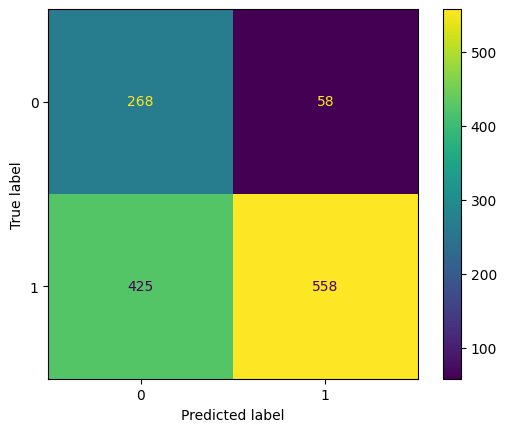

In [ ]:
y_pred = ann.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred),3)}")
print(f"recall: {round(recall_score(y_test, y_pred),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.631
precision: 0.906
recall: 0.568
f1: 0.631


Naive Byes

In [ ]:
from sklearn.naive_bayes  import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
print(nb.score(X_train, y_train))
print(nb.score(X_test, y_test))

0.8312581913499345
0.8212375859434683


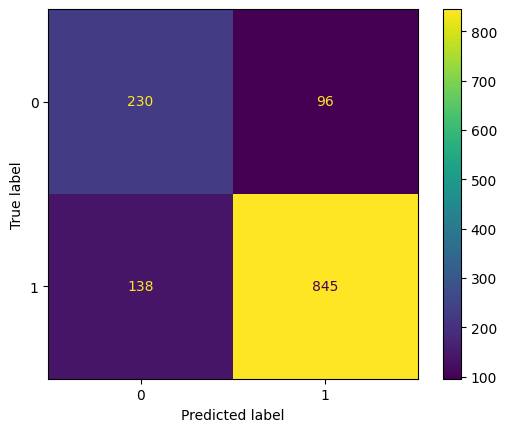

In [ ]:
y_pred = nb.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred),3)}")
print(f"recall: {round(recall_score(y_test, y_pred),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.821
precision: 0.898
recall: 0.86
f1: 0.821


CATBOOST

In [ ]:
# !pip install
!pip install catboost
from catboost  import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 13.3 MB/s eta 0:00:00


In [ ]:

cb=CatBoostClassifier()
cb.fit(X_train,y_train)

Learning rate set to 0.01659
0:	learn: 0.6650060	total: 50.6ms	remaining: 50.5s
1:	learn: 0.6406797	total: 54ms	remaining: 26.9s
2:	learn: 0.6209904	total: 57.2ms	remaining: 19s
3:	learn: 0.5974459	total: 60.5ms	remaining: 15.1s
4:	learn: 0.5815895	total: 63.7ms	remaining: 12.7s
5:	learn: 0.5623203	total: 67.1ms	remaining: 11.1s
6:	learn: 0.5438014	total: 70.4ms	remaining: 9.98s
7:	learn: 0.5255376	total: 74ms	remaining: 9.18s
8:	learn: 0.5087245	total: 77.4ms	remaining: 8.52s
9:	learn: 0.4943908	total: 84.4ms	remaining: 8.36s
10:	learn: 0.4811911	total: 94.3ms	remaining: 8.48s
11:	learn: 0.4648820	total: 97.3ms	remaining: 8.02s
12:	learn: 0.4500509	total: 100ms	remaining: 7.63s
13:	learn: 0.4353624	total: 103ms	remaining: 7.29s
14:	learn: 0.4237210	total: 107ms	remaining: 7s
15:	learn: 0.4113268	total: 110ms	remaining: 6.75s
16:	learn: 0.4001057	total: 113ms	remaining: 6.53s
17:	learn: 0.3900242	total: 116ms	remaining: 6.34s
18:	learn: 0.3801420	total: 119ms	remaining: 6.17s
19:	learn

In [ ]:
print(cb.score(X_train, y_train))
print(cb.score(X_test, y_test))

0.9888597640891219
0.9457601222307105


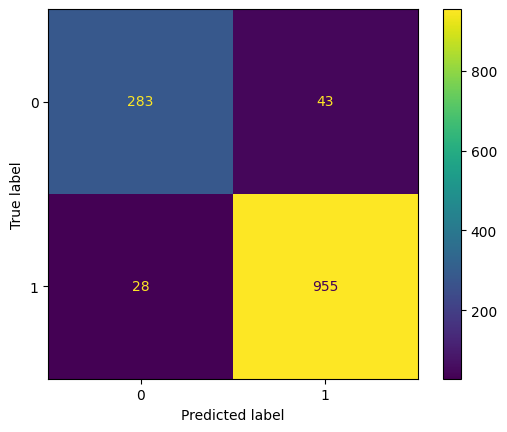

In [ ]:
y_pred = cb.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred),3)}")
print(f"recall: {round(recall_score(y_test, y_pred),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.946
precision: 0.957
recall: 0.972
f1: 0.946


GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble  import GradientBoostingClassifier
#from sklearn.metrics import classification_report
gb=GradientBoostingClassifier(learning_rate=0.1)
gb.fit(X_train,y_train)
#print(classification_report(y_test,gb.predict(X_test)))

GradientBoostingClassifier()

In [ ]:
print(nb.score(X_train, y_train))
print(nb.score(X_test, y_test))

0.8312581913499345
0.8212375859434683


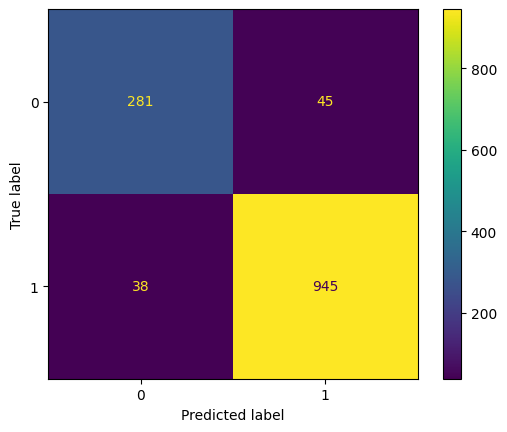

In [ ]:
y_pred = gb.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred),3)}")
print(f"recall: {round(recall_score(y_test, y_pred),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.937
precision: 0.955
recall: 0.961
f1: 0.937


ADA BOOST

In [ ]:
from sklearn.ensemble  import AdaBoostClassifier
ab=AdaBoostClassifier()
ab.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
print(ab.score(X_train, y_train))
print(ab.score(X_test, y_test))

0.9501965923984272
0.9358288770053476


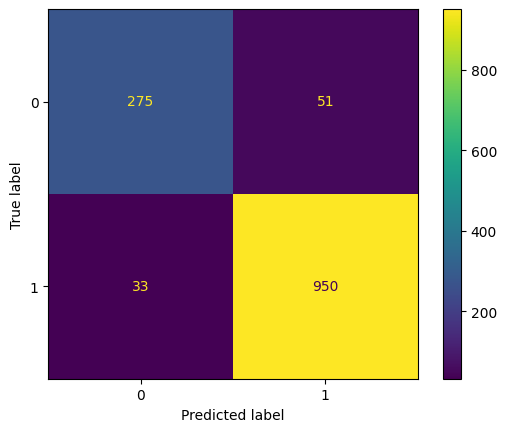

In [ ]:
y_pred = ab.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred),3)}")
print(f"recall: {round(recall_score(y_test, y_pred),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.936
precision: 0.949
recall: 0.966
f1: 0.936


CNN

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
import numpy as np
X2=np.array(X_train)
X3=np.array(X_test)
X_train2=X2.reshape(X_train.shape[0],X_train.shape[1],1)
X_test2=X3.reshape(X_test.shape[0],X_test.shape[1],1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Embedding,Dense,Flatten,MaxPooling1D,Conv1D,BatchNormalization,Dropout
# import model
model20=Sequential()
# layers
model20.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=X_train2[0].shape)) #creates a convolutional layer which extracts features from the input
model20.add(BatchNormalization()) #normalizes each feature for better accuracy and faster training
model20.add(Dropout(0.2)) # hides 20% neurons to avoid overfitting

model20.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model20.add(BatchNormalization())
model20.add(Dropout(0.5))

model20.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model20.add(BatchNormalization())
model20.add(Dropout(0.5))

model20.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model20.add(BatchNormalization())
model20.add(Dropout(0.25))

model20.add(Flatten()) #convert input into 1D
model20.add(Dense(64, activation='relu')) #fully connected layer for classification
model20.add(Dropout(0.25))

model20.add(Dense(100, activation='relu'))
model20.add(Dense(50, activation='relu'))
model20.add(Dense(25, activation='relu'))
model20.add(Dense(1, activation = "sigmoid"))

In [ ]:
model20.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history=model20.fit(X_train2,y_train,epochs=80,validation_data=(X_test2,y_test))

Epoch 1/80
96/96 [==============================] - 20s 28ms/step - loss: 0.5721 - accuracy: 0.7471 - val_loss: 0.5376 - val_accuracy: 0.7510
Epoch 2/80
96/96 [==============================] - 2s 18ms/step - loss: 0.5039 - accuracy: 0.7703 - val_loss: 0.7250 - val_accuracy: 0.7510
Epoch 3/80
96/96 [==============================] - 2s 21ms/step - loss: 0.4553 - accuracy: 0.7824 - val_loss: 0.9944 - val_accuracy: 0.7510
Epoch 4/80
96/96 [==============================] - 2s 18ms/step - loss: 0.3777 - accuracy: 0.8306 - val_loss: 0.5336 - val_accuracy: 0.7510
Epoch 5/80
96/96 [==============================] - 3s 33ms/step - loss: 0.3052 - accuracy: 0.8699 - val_loss: 0.8314 - val_accuracy: 0.7510
Epoch 6/80
96/96 [==============================] - 2s 23ms/step - loss: 0.2827 - accuracy: 0.8830 - val_loss: 0.4324 - val_accuracy: 0.7510
Epoch 7/80
96/96 [==============================] - 2s 17ms/step - loss: 0.2764 - accuracy: 0.8834 - val_loss: 0.2571 - val_accuracy: 0.8984
Epoch 8/80
9

In [ ]:
def plot_learningcurve(history,epochs):
  epoch=range(1,epochs+1)
  # accuracy
  plt.plot(epoch, history.history['accuracy'])
  plt.plot(epoch, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['train','val'], loc='upper left')
  plt.show()

  # loss
  plt.plot(epoch, history.history['loss'])
  plt.plot(epoch, history.history['val_loss'])
  plt.title('Model loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train','val'], loc='upper left')
  plt.show()

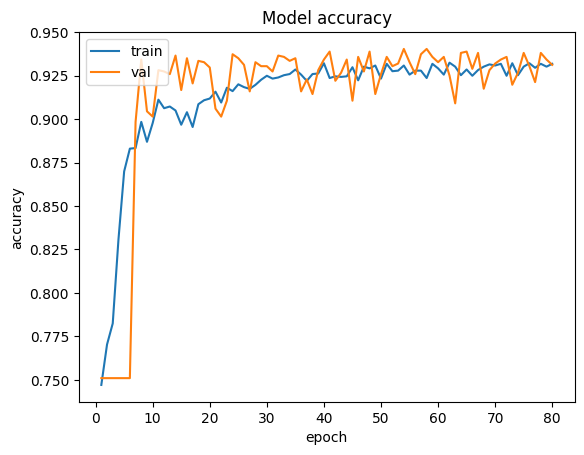

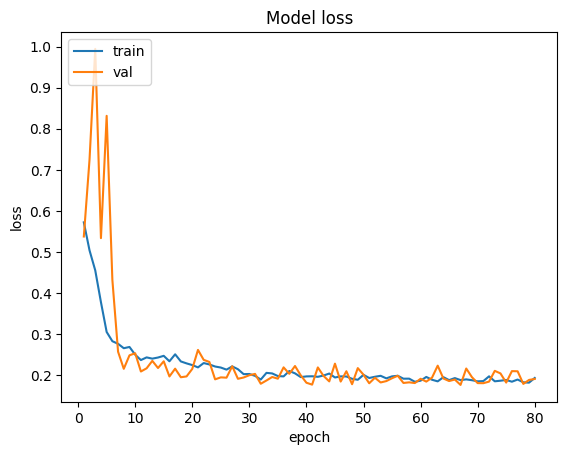

In [ ]:
plot_learningcurve(history,80)

In [ ]:

c=model20.evaluate(X_test2,y_test)

41/41 [==============================] - 0s 4ms/step - loss: 0.1908 - accuracy: 0.9312


In [ ]:
pred = (model20.predict(X_test2))
res = []
for ele in pred:
  if(ele < 0.5):
    res.append(0)
  else:
    res.append(1)
print(classification_report(y_test, res))

41/41 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       326
           1       0.94      0.97      0.96       983

    accuracy                           0.93      1309
   macro avg       0.92      0.89      0.90      1309
weighted avg       0.93      0.93      0.93      1309

